# GPU 체크

In [ ]:
# %load device_test.py
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ","  # use CPU only
# del os.environ["CUDA_VISIBLE_DEVICES"]

import tensorflow as tf

print("tf.test.is_built_with_cuda():", tf.test.is_built_with_cuda())
print("tf.test.is_gpu_available():", tf.test.is_gpu_available())

sess = tf.Session()
if (sess.list_devices): # for tensorflow 1.3+
      for d in sess.list_devices():
          print(d.name)
sess.close()

# Undocumented feature
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# hello program

In [ ]:
# %load hello.py
import tensorflow as tf

sess = tf.Session()
hello = tf.constant('Hello, TensorFlow!') # node (operation)
print(sess.run(hello)) # data flow graph의 실행

sess.close()


# 데이터 플로우 그래프
- 하나의 데이터 플로 그래프 표현
- 연산을 나타내는 노드(node)와 노드간에 교환되는 데이터인 엣지(edge)로 구성된다.
- 노드간에 교환되는 데이터는 스칼라, 벡터, 행렬 등 다차원 배열을 의미하는 텐서(tensor)이다.
![Alt text](graph_test.png)

- Const:0 => Const에 0 출력
- Const_1:0 => Const_1에 1 출력

In [ ]:
# %load graph_test.py
import tensorflow as tf

a = tf.constant(1.0)   #1.0 이라는 텐서 변수에 저장
b = tf.constant(2.0)   #2.0 이라는 텐서 변수에 저장
c = a + b

print(type(a), ",", a)
print(type(b), ",", b)
print(type(c), ",", c)  #결과적으로 텐서 3개가 만들어짐.

In [ ]:
print("get_operations():")  

#operation 객체가 node 객체인데 모두 출력.
for op in tf.get_default_graph().get_operations():
    print("op.name: ", op.name, ", op.type: ", op.type, ", op.inputs: ", [x for x in op.inputs],
              ", op.outputs: ", [x for x in op.outputs], sep="")
g = tf.get_default_graph()
print(a.graph is g)

In [ ]:
print("Const:", g.get_operation_by_name("Const"))
print("Const.output[0]:", g.get_operation_by_name("Const").outputs[0])
print("Const:0", g.get_tensor_by_name("Const:0"))
print("a:", a, type(a))
print("a.name: ", a.name, ", a.op.name: ", a.op.name, ", a.value_index: ", a.value_index,
          ", a.shape: ", a.shape, ", a.dtype: ", a.dtype, sep="")

print("Const_1:", g.get_operation_by_name("Const_1"))
print("Const_1.outputs[0]:", g.get_operation_by_name("Const_1").outputs[0])
print("Const_1:0", g.get_tensor_by_name("Const_1:0"))
print("b:", b, type(b))
print("b.name: ", b.name, ", b.op.name: ", b.op.name, ", b.value_index: ", b.value_index,
          ", b.shape: ", b.shape, ", b.dtype: ", b.dtype, sep="")

print("add:", g.get_operation_by_name("add"))
print("add.outputs[0]:", g.get_operation_by_name("add").outputs[0])
print("add.inputs[0]:", g.get_operation_by_name("add").inputs[0])
print("add.inputs[1]:", g.get_operation_by_name("add").inputs[1])
print("c:", c, type(c))
print("c.name: ", c.name, ", c.op.name: ", c.op.name, ", c.value_index: ", c.value_index,
          ", c.shape: ", c.shape, ", c.dtype: ", c.dtype, sep="")

In [ ]:
sess = tf.Session()
v = sess.run(g.get_tensor_by_name("Const:0"))   #run 에서 나올때는 numpy 타입으로 나옴
print("%s: %r\n" % (type(v), v))
sess.close()

# 세션 관리

In [ ]:
# %load session_test.py
import tensorflow as tf

# 텐서플로 기본 그래프 생성
a = tf.constant(1)
b = tf.constant(2)
c = a + b
addOp = tf.get_default_graph().get_operation_by_name("add")

# 세션 생성 및 닫기
sess = tf.Session()
v = sess.run(c)                   #c를 실행하기 위해 내부적으로 a와 b도 실행됨.
print("%s: %r\n" % (type(v), v))
v = sess.run(addOp)               #addOp도 따로 실행 가능.
print("%s: %r\n" % (type(v), v))
sess.close()

In [ ]:
# 세션 생성 및 자동 닫기 (with 안에 있는 두 문장이 실행되고 자동으로 세션 닫음)
with tf.Session() as sess:
    v = sess.run(c)
    print("%s: %r\n" % (type(v), v))

# 기본 세션 (as_default())
sess = tf.Session()
with sess.as_default():                #sess 객체를 생성 후 default세션 지정. (with 안에서만)
    v = addOp.run()
    print("%s: %r\n" % (type(v), v))
    v = c.eval()
    print("%s: %r\n" % (type(v), v))

sess.close()

# 기본 세션 (tf.InteractiveSession)
sess = tf.InteractiveSession()         #만드는 즉시 default 세션이 됨
v = addOp.run()
print("%s: %r\n" % (type(v), v))
v = c.eval()
print("%s: %r\n" % (type(v), v))
sess.close()

In [ ]:
# %load session_inout_test.py
# tensorflow에서는 numpy나 list 지원.
import tensorflow as tf

sess = tf.Session()

a = tf.constant(1)
b = tf.constant(2)
c = a + b
x = tf.constant([10, 20])         #list를 텐서로 만듦
y = tf.constant([1.0, 2.0])

v = sess.run(a)
print("%s: %r\n" % (type(v), v))

v = sess.run(c)
print("%s: %r\n" % (type(v), v))

v = sess.run(x)                   #numpy 형태로 출력됨.
print("%s: %r\n" % (type(v), v))

v = sess.run([x, y])              #numpy 형태가 묶여서 리스트 형태로 출력됨. (run에서 지정해준대로 출력된다)
print("%s: %r\n" % (type(v), v))

import collections
MyData = collections.namedtuple('MyData', ['x', 'y'])
v = sess.run({'k1': MyData(x, y), 'k2': [y, x]})
print("%s: %r\n" % (type(v), v))

v = sess.run(c, feed_dict={a: 3, b: 4})    #feed_dict는 텐서를 변경할 때 사용. 외부 데이터를 input할 때.
print(v)


# 상수
상수 텐서와 그 상수 텐서의 값을 채우는 텐서 연산을 생성한다.

In [ ]:
# %load constant_test.py
import tensorflow as tf
import numpy as np

sess = tf.Session()

In [ ]:
# 값 상수 텐서

c1 = tf.constant(1.0)
print(type(c1), ",", c1, ",", c1.shape, ",", c1.dtype, ",", sess.run(c1))
c2 = tf.constant([1.0, 2.0, 3.0])
print(c2.shape, ",", c2.dtype, ",", sess.run(c2))
c3 = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(c3.shape, ",", c3.dtype, ",", sess.run(c3))
c4 = tf.constant(np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]))
print(c4.shape, ",", c4.dtype, ",", sess.run(c4))
c5 = tf.constant(1.0, shape=(2,3))
print(c5.shape, ",", c5.dtype, ",", sess.run(c5))
c6 = tf.constant([1.0, 2.0], shape=(2,3))
print(c6.shape, ",", c6.dtype, ",", sess.run(c6))
c7 = tf.constant([1, 2, 3])
print(c7.dtype, ",", sess.run(c7))

In [ ]:
# 특정값 상수 텐서

print(sess.run(tf.zeros([3])))           #0으로 초기화된 텐서
print(sess.run(tf.ones([3])))            #1로 초기화된 텐서
print(sess.run(tf.fill([3], 2.0)))
print(sess.run(tf.zeros_like((c2))))
print(sess.run(tf.ones_like((c2))))

In [ ]:
# 시퀀스

c8 = tf.range(1, 5)
print(type(c8), ",", c8, ",", sess.run(c8))
c9 = tf.range(5)
print(type(c9), ",", c9, ",", sess.run(c9))
print(sess.run(tf.lin_space(1.0, 3.0, 3)))

sess.close()

# 변수
여러 세션간에 공유되어 영속적으로 존재하는 변수 (tf.Variable 클래스)

In [ ]:
# %load variable_test.py
import tensorflow as tf

#get_variable 이 권장되는 방법. 참조해서 있으면 사용하고 없으면 생성하기 때문.
v1 = tf.get_variable("v1", (2,))                 #첫번째 인자가 변수명, 두번째 인자가 크기. #(2,)에서 ',' 역할은 tuple을 만들기 위해
v2 = tf.get_variable("v2", (2,), dtype=tf.int32)
v3 = tf.get_variable("v3", dtype=tf.int32, initializer=tf.constant([3, 4]))        #옵션에서 값을 대입해서 초기화까지 시켜준다.

assign = v1.assign(tf.constant([3.0, 4.0]))      #변수에 값을 대입할 때는 assign 함수를 사용해서 대입한다.
print(type(v1), v1)

init = tf.global_variables_initializer()         #초기화해주는 함수

with tf.Session() as sess:
    sess.run(init)                               #초기화 된 변수를 run해줘야 함.
    print(sess.run([v1, v2, v3, assign]))


# placeholder
노드에 전달되는 매개 변수 역할 (텐서의 일종)

In [ ]:
# %load placeholder_test.py
import tensorflow as tf

a = tf.placeholder(tf.int16)    #일단 자료형 지정
b = tf.placeholder(tf.int16)

print(type(a), a)

add = tf.add(a, b) # same with 'a + b'
mul = tf.multiply(a, b) # same with 'a * b'
print(mul)

with tf.Session() as sess:
    print("Addition with variables: %d" % sess.run(add, feed_dict={a:2, b:3}))
    print("Multiplication with variables: %d" % sess.run(mul, feed_dict={a:2, b:3}))


In [ ]:
# %load matmul_test.py
import tensorflow as tf

a = tf.constant([[3., 3.]])  # 1 x 2 matrix
b = tf.constant([[2.], [2.]]) # 2 x 1 matrix

product = tf.matmul(a, b)

with tf.Session() as sess:
    print(sess.run(product))


# GPU와 CPU 속도 비교

- GPU의 경우 24000 * 24000 이 5초 걸림
- CPU의 경우 24000 * 24000 이 120초 걸림

In [ ]:
# %load matmul_speed_test.py
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ","  # use CPU only
# del os.environ["CUDA_VISIBLE_DEVICES"]

import tensorflow as tf
import time

for size in [1000, 2000, 4000, 8000, 16000, 24000]:  # 12 MB, 48 MB, 192 MB, 768 MB, 3 GB, 6.75 GB
    a = tf.random_uniform((size, size), 0.0, 1.0)
    b = tf.random_uniform((size, size), 0.0, 1.0)
    c = tf.matmul(a, b)

    with tf.Session() as sess:
        start = time.time()
        sess.run(c)
        end = time.time()

    print("%s: %f 초" % (c.shape, end - start))
    a = b = c = None    # 쓰레기 수집
    tf.reset_default_graph()



# 최적화 문제 - 분석적 해법 (최적 해)

- 손실 함수    
    - x^4 - 3 x^3 + 2
- 풀이
    - f'(x) = 4 x^3 - 9 x^2 = 0
    - f(0) = 2
    - f(2.25) = 2.25^4 - 3*2.25^3 + 2 = -6.54296875

#  절차적 해법 (근사 해)
- 실제로는 위의 방법처럼 인수분해를 통해 찾기 어렵기 때문에 근사 해를 찾는다

In [ ]:
# %load gradient_descent_test.py
## 학습 알고리듬 설정
x = 6 # The algorithm starts at x=6     #초기값
delta = 0.01 # step size
n = 50 # number of learning iterations

## 손실 함수
def f(x):
    return x ** 4 - 3 * x ** 3 + 2

## 수작업 미분 함수
def f_derivative(x):
    return 4 * x**3 - 9 * x**2

## 경사하강 학습
print("%3d: f(%f) = %f" % (0, x, f(x)))

for count in range(n):
    x -= delta * f_derivative(x)
    print("%3d: f(%f) = %f" % ((count+1), x, f(x)))


# 절차적 해법 (텐서플로)

In [ ]:
# %load gradient_descent_tf_test.py
import tensorflow as tf

precision = 0.00001

## 최적화 함수 정의

x = tf.get_variable("x", initializer=6.0)
y = x**4 - 3 * x**3 + 2                      # x가 텐서이기 때문에 전부 다 텐서 연산이 된다.

## 경사 하강 알고리듬 설정

a = tf.get_variable("a", initializer=0.01) # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(y)

# 변수 초기화
init = tf.global_variables_initializer()

## 훈련
sess = tf.Session()
sess.run(init)

count = 0
x_old = 0
x_new = sess.run(x)
print("%3d: f(%f) = %f, precision: %f" % (count, x_new, sess.run(y), x_new - x_old))

# 한번 돌 때마다 한번 학습
while abs(x_new - x_old) > precision:
    count += 1
    x_old = x_new
    sess.run(train)
    x_new = sess.run(x)
    print("%3d: f(%f) = %f, precision: %f" % (count, x_new, sess.run(y), x_new - x_old))

print("Local minimum occurs at", x_new)


# 경사하강 학습법 - 단순 선형회귀

In [ ]:
# %load simple_linear_regression_gd_tf_test.py
import tensorflow as tf

## 데이터 수집

x_data = [1, 2, 3]
y_data = [1, 2, 3]

## 예측 모델 정의

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
y = W * x_data + b            #예측값

## 비용 함수, 최적화 함수 정의

cost = tf.reduce_mean(tf.square(y - y_data))     # reduce_mean 함수로 벡터값을 스칼라값으로 바꿔줌. 
a = tf.Variable(0.1) # learning rate, alpha      # 학습률을 변경할수도 있기때문에 변수지정
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

## 훈련
sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


In [ ]:
# %load simple_linear_regression_gd_tf_placeholder_test.py
import tensorflow as tf

## 데이터 수집

x_data = [1, 2, 3]
y_data = [1, 2, 3]

## 예측 모델 정의

X = tf.placeholder("float")
y = tf.placeholder("float")
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
pred = W * X + b

## 비용 함수, 최적화 함수 정의

cost = tf.reduce_mean(tf.square(pred - y))
a = tf.Variable(0.1) # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
# 변수 초기화
init = tf.global_variables_initializer()

## 훈련
sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict = {X: x_data, y: y_data}) 
    if step % 20 == 0:
        cost_, W_, b_ = sess.run([cost, W, b], feed_dict = {X: x_data, y: y_data}) 
        print(step, cost_, W_, b_)

print(sess.run(pred, feed_dict = {X: [2]}))


# 실제 예시 (insurance.csv)

In [ ]:
# %load insurance_simple_linear_regression_gd_tf_test.py
import tensorflow as tf
import math
import numpy as np
import pandas as pd

## 데이터 수집

insurance = pd.read_csv("insurance.csv")
print(insurance[0:5])

age = insurance["age"].values
expenses = insurance["expenses"].values

print("\n [age, expenses] : ",[age,expenses])

In [ ]:
## 예측 모델 정의
X = tf.placeholder("float")
Y = tf.placeholder("float")

tf_coef = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
tf_intercept = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
tf_expenses_pred = tf_coef * X + tf_intercept

In [ ]:
## 비용 함수, 최적화 함수 정의
tf_cost = tf.reduce_mean(tf.square(tf_expenses_pred - Y))
a = tf.Variable(0.0001)

optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(tf_cost)

#변수 초기화
init = tf.global_variables_initializer()

In [ ]:
## 훈련
sess = tf.Session()
sess.run(init)
for step in range(300000):
  sess.run(train, feed_dict={X: age, Y: expenses})
  if step % 10000 == 0:
    cost, coef, intercept = sess.run([tf_cost, tf_coef, tf_intercept], feed_dict={X: age, Y: expenses})
    print(step, cost, math.sqrt(cost), coef, intercept)

In [ ]:
## 예측
coef = sess.run(tf_coef)
intercept = sess.run(tf_interceopt)
print(coef * np.array[20, 40, 60])
......


# 텐서보드 (TensorBoard)

알고리듬이 어떻게 돌아가고 있는지 알려주기 위해 많은 정보를 모니터링하고 디스플레이해준다.

In [ ]:
!c:\anaconda3\scripts\tensorboard --logdir /tmp/summary_logs

In [ ]:
# %load summary_test.py
import tensorflow as tf

tf.reset_default_graph()

## 데이터 수집

x_data = [1, 2, 3]
y_data = [1, 2, 3]

## 예측 모델 정의

W = tf.get_variable("W", initializer=tf.random_uniform([1], -1.0, 1.0))
b = tf.get_variable("b", initializer=tf.random_uniform([1], -1.0, 1.0))
y = W * x_data + b

## 비용 함수, 최적화 함수 정의

cost = tf.reduce_mean(tf.square(y - y_data))
alpha = tf.get_variable("alpha", initializer=0.01) # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

## 초기화, summary and graph log

init = tf.global_variables_initializer()

tf.summary.scalar("cost", cost)
tf.summary.scalar("W", W[0])
tf.summary.scalar("b", b[0])

summary_op = tf.summary.merge_all()
saver = tf.train.Saver()

sess = tf.Session()
summary_writer = tf.summary.FileWriter("summary_logs/", sess.graph)
sess.run(init)

## 훈련

for step in range(500):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
    summary_str = sess.run(summary_op)
    summary_writer.add_summary(summary_str, step)
    saver.save(sess, "summary_logs/model-checkpoint", global_stbep=step)


http://localhost:6006 방문

# MNIST 예제

In [1]:
!c:\Anaconda3\tensorboard --logdir /tmp/mnist_logs

/bin/sh: 1: c:Anaconda3tensorboard: not found


In [2]:
# %load mnist_softmax_gd_tf_summary_test.py
# Copyright (c) 2016-2017, Deogtae Kim & DTWARE Inc. All rights reserved.
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ","
# del os.environ["CUDA_VISIBLE_DEVICES"]

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()
tf.set_random_seed(107)

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
## 데이터 수집

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

## 데이터 시각화, 전처리

print(type(mnist.train))
print(dir(mnist))
print(type(mnist.train.images), type(mnist.train.labels))
print(mnist.train.images.shape)
print(mnist.train.images[0].shape)
print(mnist.train.images[0])
print(mnist.train.labels.shape)
print(mnist.train.labels[0].shape)
print(mnist.train.labels[0])
print(mnist.train.num_examples, mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.num_examples, mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.num_examples, mnist.test.images.shape, mnist.test.labels.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__'

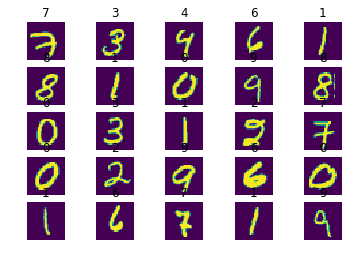

In [4]:
%matplotlib inline          
# 시각화하는 패키지. 웹브라우져에서 보여줄 수 있게끔 inline으로 선언
fig, axes = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        axes[i,j].axis('off')
        axes[i,j].imshow(mnist.train.images[i*5+j].reshape(28,28))
        axes[i,j].set_title("%d" % np.argmax(mnist.train.labels[i*5+j]))

In [ ]:
## 예측 모델 정의: 소프트맥스 회귀 모델

X = tf.placeholder(tf.float32, [None, 784])                 # 행의 개수 변경 없으므로 None
Y = tf.placeholder(tf.float32, [None, 10])
W = tf.get_variable("W", initializer=tf.zeros([784, 10]))
b = tf.get_variable("b", initializer=tf.zeros([10]))
# 각 데이터에 대한 각 분류별 점수
score = tf.matmul(X, W) + b         # 행렬의 곱이기 때문에 matmul(W, X)가 아닌 matmul(X, W). [5500, 784] * [784, 10]이 되어야 하므로
# 각 데이터에 대한 각 분류별 확률
pred = tf.nn.softmax(score)

## 손실 함수, 정확도, 최적화 함수 정의

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), reduction_indices=[1]))
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))                    # 숫자로 바꿔주는 코드.
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
train_step = tf.train.AdamOptimizer(0.001).minimize(cost)

# 로그 초기화

tf.summary.histogram("W histogram", W)
tf.summary.histogram("b histogram", b)
tf.summary.scalar("cost", cost)
tf.summary.scalar("accuracy", accuracy)

summary_op = tf.summary.merge_all()
saver = tf.train.Saver()

sess = tf.Session()
summary_writer = tf.summary.FileWriter("mnist_logs/", sess.graph)

## 훈련

sess.run(tf.global_variables_initializer())
import time
start = time.time()
for epoch in range(50):
    avg_cost = 0
    batch_count = int(mnist.train.num_examples / 100)
    for _ in range(batch_count):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        c, _  = sess.run([cost, train_step], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / batch_count
#    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 
#          ', accuacy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 
          ', validation accuacy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})))
    summary_str = sess.run(summary_op, feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})
    summary_writer.add_summary(summary_str, epoch)
    saver.save(sess, "mnist_logs/model-checkpoint", global_step=epoch)
    
print('accuacy = ', '{:.9f}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})))
print("훈련 시간:", time.time() - start)  

## 모델 평가

print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
sess.close()

http://localhost:6006 방문